In [4]:
import pandas as pd
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from scipy import stats as stats
%matplotlib inline

In [5]:
df = pd.read_csv('data/kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df['date'].value_counts()

6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
5/17/2014      1
8/3/2014       1
3/8/2015       1
5/15/2015      1
1/31/2015      1
Name: date, Length: 372, dtype: int64

I need to encode waterfront and view, make condition a float, make grade a float, and make sqft_basement a float.

I'm also missing some values for yr_renovated.

In [8]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [9]:
condition_dummies = pd.get_dummies(df['waterfront'])

condition_dummies

,NO,YES
0,0,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
21592,1,0
21593,1,0
21594,1,0
21595,0,0


In [10]:
query = """

SELECT *
FROM df
WHERE waterfront IS NOT NULL AND view IS NOT NULL AND yr_renovated IS NOT NULL

"""

houses = pysqldf(query)

houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
1,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
2,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
3,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
4,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15757,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,8 Good,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
15758,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
15759,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
15760,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [11]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15762 entries, 0 to 15761
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

In [12]:
houses['condition'].value_counts()

Average      10221
Good          4137
Very Good     1254
Fair           131
Poor            19
Name: condition, dtype: int64

In [13]:
houses['condition'] = houses['condition'].replace(['Poor','Fair','Average','Good','Very Good'], ['1','2','3','4','5']).astype(float)

In [14]:
houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
1,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
2,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
3,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
4,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15757,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,8 Good,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
15758,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
15759,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
15760,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [15]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15762 entries, 0 to 15761
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  float64
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

In [16]:
houses['sqft_basement'].value_counts()

0.0       9362
?          333
600.0      155
500.0      151
700.0      148
          ... 
1852.0       1
3480.0       1
295.0        1
1281.0       1
2080.0       1
Name: sqft_basement, Length: 283, dtype: int64

In [17]:
houses['basement_sqft'] = houses['sqft_basement'].replace('?','0.0').astype(float)

In [18]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15762 entries, 0 to 15761
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  float64
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

In [19]:
del houses['sqft_basement']

In [20]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15762 entries, 0 to 15761
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  float64
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  yr_built       15762 non-null  int64  
 14  yr_renovated   15762 non-null  float64
 15  zipcode        15762 non-null  int64  
 16  lat            15762 non-null  float64
 17  long           15762 non-null  float64
 18  sqft_l

In [21]:
pd.get_dummies(houses['waterfront'])

,NO,YES
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
15757,1,0
15758,1,0
15759,1,0
15760,1,0


In [22]:
houses2 = houses.join(pd.get_dummies(houses['waterfront']))

houses2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement_sqft,NO,YES
0,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,400.0,1,0
1,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0.0,98136,47.5208,-122.393,1360,5000,910.0,1,0
2,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,1,0
3,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,2001,0.0,98053,47.6561,-122.005,4760,101930,1530.0,1,0
4,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,1995,0.0,98003,47.3097,-122.327,2238,6819,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15757,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,2008,0.0,98116,47.5773,-122.409,1330,1265,130.0,1,0
15758,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0,1,0
15759,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0,1,0
15760,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0,1,0


In [23]:
houses2['view'].value_counts()

NONE         14241
AVERAGE        688
GOOD           348
FAIR           245
EXCELLENT      240
Name: view, dtype: int64

In [24]:
houses2['view'] = houses2['view'].replace(['NONE','AVERAGE','GOOD','FAIR','EXCELLENT'], ['0','2','3','1','4']).astype(float)

In [25]:
houses2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement_sqft,NO,YES
0,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,400.0,1,0
1,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,910.0,1,0
2,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,1,0
3,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,0.0,...,2001,0.0,98053,47.6561,-122.005,4760,101930,1530.0,1,0
4,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,0.0,...,1995,0.0,98003,47.3097,-122.327,2238,6819,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15757,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,0.0,...,2008,0.0,98116,47.5773,-122.409,1330,1265,130.0,1,0
15758,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,0.0,...,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0,1,0
15759,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,0.0,...,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0,1,0
15760,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,0.0,...,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0,1,0


In [26]:
del houses2['waterfront']

In [27]:
houses2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement_sqft,NO,YES
0,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,400.0,1,0
1,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,910.0,1,0
2,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,1,0
3,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3.0,...,2001,0.0,98053,47.6561,-122.005,4760,101930,1530.0,1,0
4,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,3.0,...,1995,0.0,98003,47.3097,-122.327,2238,6819,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15757,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,3.0,...,2008,0.0,98116,47.5773,-122.409,1330,1265,130.0,1,0
15758,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,3.0,...,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0,1,0
15759,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,3.0,...,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0,1,0
15760,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,3.0,...,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0,1,0


In [28]:
del houses2['zipcode']

In [29]:
del houses2['date']

In [30]:
del houses2['id']

In [31]:
houses2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15762 entries, 0 to 15761
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15762 non-null  float64
 1   bedrooms       15762 non-null  int64  
 2   bathrooms      15762 non-null  float64
 3   sqft_living    15762 non-null  int64  
 4   sqft_lot       15762 non-null  int64  
 5   floors         15762 non-null  float64
 6   view           15762 non-null  float64
 7   condition      15762 non-null  float64
 8   grade          15762 non-null  object 
 9   sqft_above     15762 non-null  int64  
 10  yr_built       15762 non-null  int64  
 11  yr_renovated   15762 non-null  float64
 12  lat            15762 non-null  float64
 13  long           15762 non-null  float64
 14  sqft_living15  15762 non-null  int64  
 15  sqft_lot15     15762 non-null  int64  
 16  basement_sqft  15762 non-null  float64
 17  NO             15762 non-null  uint8  
 18  YES   

In [32]:
grade_split = houses2['grade'].str.split('', n=2, expand=True)

grade_split

,0,1,2
0,,7,Average
1,,7,Average
2,,8,Good
3,,1,1 Excellent
4,,7,Average
...,...,...,...
15757,,8,Good
15758,,8,Good
15759,,8,Good
15760,,7,Average


In [33]:
houses2['grade'] = grade_split[1].astype(float)

In [35]:
houses2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15762 entries, 0 to 15761
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15762 non-null  float64
 1   bedrooms       15762 non-null  int64  
 2   bathrooms      15762 non-null  float64
 3   sqft_living    15762 non-null  int64  
 4   sqft_lot       15762 non-null  int64  
 5   floors         15762 non-null  float64
 6   view           15762 non-null  float64
 7   condition      15762 non-null  float64
 8   grade          15762 non-null  float64
 9   sqft_above     15762 non-null  int64  
 10  yr_built       15762 non-null  int64  
 11  yr_renovated   15762 non-null  float64
 12  lat            15762 non-null  float64
 13  long           15762 non-null  float64
 14  sqft_living15  15762 non-null  int64  
 15  sqft_lot15     15762 non-null  int64  
 16  basement_sqft  15762 non-null  float64
 17  NO             15762 non-null  uint8  
 18  YES   

In [36]:
houses2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,basement_sqft,NO,YES
0,538000.0,3,2.25,2570,7242,2.0,0.0,3.0,7.0,2170,1951,1991.0,47.7210,-122.319,1690,7639,400.0,1,0
1,604000.0,4,3.00,1960,5000,1.0,0.0,5.0,7.0,1050,1965,0.0,47.5208,-122.393,1360,5000,910.0,1,0
2,510000.0,3,2.00,1680,8080,1.0,0.0,3.0,8.0,1680,1987,0.0,47.6168,-122.045,1800,7503,0.0,1,0
3,1230000.0,4,4.50,5420,101930,1.0,0.0,3.0,1.0,3890,2001,0.0,47.6561,-122.005,4760,101930,1530.0,1,0
4,257500.0,3,2.25,1715,6819,2.0,0.0,3.0,7.0,1715,1995,0.0,47.3097,-122.327,2238,6819,0.0,1,0


In [37]:
model_data = houses2[0:12609]

model_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,basement_sqft,NO,YES
0,538000.0,3,2.25,2570,7242,2.0,0.0,3.0,7.0,2170,1951,1991.0,47.7210,-122.319,1690,7639,400.0,1,0
1,604000.0,4,3.00,1960,5000,1.0,0.0,5.0,7.0,1050,1965,0.0,47.5208,-122.393,1360,5000,910.0,1,0
2,510000.0,3,2.00,1680,8080,1.0,0.0,3.0,8.0,1680,1987,0.0,47.6168,-122.045,1800,7503,0.0,1,0
3,1230000.0,4,4.50,5420,101930,1.0,0.0,3.0,1.0,3890,2001,0.0,47.6561,-122.005,4760,101930,1530.0,1,0
4,257500.0,3,2.25,1715,6819,2.0,0.0,3.0,7.0,1715,1995,0.0,47.3097,-122.327,2238,6819,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12604,349900.0,2,1.75,1550,9230,1.0,0.0,3.0,6.0,970,1969,0.0,47.4701,-121.744,1550,10856,580.0,1,0
12605,690000.0,4,2.50,2780,6235,2.0,0.0,3.0,8.0,2780,2001,0.0,47.5976,-122.039,2670,4410,0.0,1,0
12606,1450000.0,5,4.00,4070,11334,2.0,0.0,3.0,1.0,4070,2014,0.0,47.6771,-122.187,2640,9401,0.0,1,0
12607,1290000.0,3,2.50,3240,12625,2.0,0.0,3.0,1.0,3240,1987,0.0,47.5327,-122.232,3470,12331,0.0,1,0


In [38]:
test_data = houses2[12610:15761]

test_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,basement_sqft,NO,YES
12610,640000.0,3,3.50,2480,10800,2.0,0.0,3.0,8.0,2480,1998,0.0,47.6083,-122.060,2380,11310,0.0,1,0
12611,499950.0,5,2.50,3180,23809,1.0,0.0,3.0,9.0,3180,1978,0.0,47.3727,-122.054,2500,15778,0.0,1,0
12612,387500.0,4,1.00,1370,7140,2.0,0.0,3.0,6.0,1370,1942,0.0,47.5120,-122.376,1090,6300,0.0,1,0
12613,254950.0,4,2.00,2180,8800,1.0,0.0,5.0,7.0,1170,1977,0.0,47.3676,-122.046,1630,8800,0.0,1,0
12614,500000.0,4,2.25,2420,36680,2.0,0.0,4.0,8.0,2420,1977,0.0,47.4663,-122.006,2410,36680,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15756,1010000.0,4,3.50,3510,7200,2.0,0.0,3.0,9.0,2600,2009,0.0,47.5537,-122.398,2050,6200,910.0,1,0
15757,475000.0,3,2.50,1310,1294,2.0,0.0,3.0,8.0,1180,2008,0.0,47.5773,-122.409,1330,1265,130.0,1,0
15758,360000.0,3,2.50,1530,1131,3.0,0.0,3.0,8.0,1530,2009,0.0,47.6993,-122.346,1530,1509,0.0,1,0
15759,400000.0,4,2.50,2310,5813,2.0,0.0,3.0,8.0,2310,2014,0.0,47.5107,-122.362,1830,7200,0.0,1,0


In [39]:
x = sm.add_constant(model_data.drop('price', axis=1))
y = model_data['price']

base_model = sm.OLS(y, x).fit()

In [40]:
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     1618.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        20:00:12   Log-Likelihood:            -1.7230e+05
No. Observations:               12609   AIC:                         3.446e+05
Df Residuals:                   12591   BIC:                         3.448e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -3.01e+07   1.43e+06    -21.018      0.000   -3.29e+07   -2.73e+07
bedrooms      -3.674e+04   2494.648    -14.729      0.000   -4.16e+04   -3.19e+04
bathrooms      5.791e+04   4437.674     13.050      0.000    4.92e+04    6.66e+04
sqft_living     172.6914     23.773      7.264      0.000     126.093     219.290
sqft_lot          0.1156      0.065      1.772      0.076      -0.012       0.243
floors         6639.3583   5118.221      1.297      0.195   -3393.135    1.67e+04
view           5.313e+04   2840.708     18.702      0.000    4.76e+04    5.87e+04
condition      3.727e+04   3034.513     12.282      0.000    3.13e+04    4.32e+04
grade         -1.998e+04   1078.987    -18.521      0.000   -2.21e+04   -1.79e+04
sqft_above       58.0839     23.818      2.439      0.015      11.397     104.770
yr_built      -1977.5035     97.344    -20.315      0.000   -2168.313   -1786.694
yr_renovated     32.0833      4.857      6.606      0.000      22.563      41.604
lat              6.1e+05   1.39e+04     43.917      0.000    5.83e+05    6.37e+05
long          -1.656e+05   1.62e+04    -10.198      0.000   -1.97e+05   -1.34e+05
sqft_living15    81.0689      4.515     17.954      0.000      72.218      89.920
sqft_lot15       -0.4545      0.098     -4.628      0.000      -0.647      -0.262
basement_sqft    -4.3289     23.542     -0.184      0.854     -50.476      41.818
NO            -1.536e+07   7.16e+05    -21.449      0.000   -1.68e+07    -1.4e+07
YES           -1.474e+07   7.16e+05    -20.581      0.000   -1.61e+07   -1.33e+07
==============================================================================
Omnibus:                    10507.172   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1051671.026
Skew:                           3.439   Prob(JB):                         0.00
Kurtosis:                      47.209   Cond. No.                     1.96e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.54e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

So we can remove sqft_lot, floors, basement_sqft from our model based on P>|t|. 

We can also combine some features like bedroom, bathroom, and sqft_above since they all help account for sqft_living.

In [41]:
del houses2['sqft_lot']

In [42]:
del houses2['floors']

In [43]:
del houses2['basement_sqft']

In [44]:
houses2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15762 entries, 0 to 15761
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15762 non-null  float64
 1   bedrooms       15762 non-null  int64  
 2   bathrooms      15762 non-null  float64
 3   sqft_living    15762 non-null  int64  
 4   view           15762 non-null  float64
 5   condition      15762 non-null  float64
 6   grade          15762 non-null  float64
 7   sqft_above     15762 non-null  int64  
 8   yr_built       15762 non-null  int64  
 9   yr_renovated   15762 non-null  float64
 10  lat            15762 non-null  float64
 11  long           15762 non-null  float64
 12  sqft_living15  15762 non-null  int64  
 13  sqft_lot15     15762 non-null  int64  
 14  NO             15762 non-null  uint8  
 15  YES            15762 non-null  uint8  
dtypes: float64(8), int64(6), uint8(2)
memory usage: 1.7 MB


In [45]:
houses2['livable_area'] = houses2['bedrooms'] * houses2['bathrooms'] * houses2['sqft_living'] * houses2['sqft_above']

In [46]:
houses2.head()

,price,bedrooms,bathrooms,sqft_living,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,NO,YES,livable_area
0,538000.0,3,2.25,2570,0.0,3.0,7.0,2170,1951,1991.0,47.7210,-122.319,1690,7639,1,0,3.764408e+07
1,604000.0,4,3.00,1960,0.0,5.0,7.0,1050,1965,0.0,47.5208,-122.393,1360,5000,1,0,2.469600e+07
2,510000.0,3,2.00,1680,0.0,3.0,8.0,1680,1987,0.0,47.6168,-122.045,1800,7503,1,0,1.693440e+07
3,1230000.0,4,4.50,5420,0.0,3.0,1.0,3890,2001,0.0,47.6561,-122.005,4760,101930,1,0,3.795084e+08
4,257500.0,3,2.25,1715,0.0,3.0,7.0,1715,1995,0.0,47.3097,-122.327,2238,6819,1,0,1.985327e+07


In [47]:
model2_columns = houses2[['price','view','condition','grade','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15','NO','YES','livable_area']]

In [48]:
model2_columns

,price,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,NO,YES,livable_area
0,538000.0,0.0,3.0,7.0,1951,1991.0,47.7210,-122.319,1690,7639,1,0,3.764408e+07
1,604000.0,0.0,5.0,7.0,1965,0.0,47.5208,-122.393,1360,5000,1,0,2.469600e+07
2,510000.0,0.0,3.0,8.0,1987,0.0,47.6168,-122.045,1800,7503,1,0,1.693440e+07
3,1230000.0,0.0,3.0,1.0,2001,0.0,47.6561,-122.005,4760,101930,1,0,3.795084e+08
4,257500.0,0.0,3.0,7.0,1995,0.0,47.3097,-122.327,2238,6819,1,0,1.985327e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15757,475000.0,0.0,3.0,8.0,2008,0.0,47.5773,-122.409,1330,1265,1,0,1.159350e+07
15758,360000.0,0.0,3.0,8.0,2009,0.0,47.6993,-122.346,1530,1509,1,0,1.755675e+07
15759,400000.0,0.0,3.0,8.0,2014,0.0,47.5107,-122.362,1830,7200,1,0,5.336100e+07
15760,402101.0,0.0,3.0,7.0,2009,0.0,47.5944,-122.299,1020,2007,1,0,1.560600e+06


In [145]:
model2_data = model2_columns

In [146]:
x2 = sm.add_constant(model2_data.drop('price', axis=1))
y2 = model2_data['price']

model2 = sm.OLS(y2, x2).fit()

In [147]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     2603.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        21:41:51   Log-Likelihood:            -2.1638e+05
No. Observations:               15762   AIC:                         4.328e+05
Df Residuals:                   15750   BIC:                         4.329e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.117e+07   1.28e+06    -32.229      0.000   -4.37e+07   -3.87e+07
view           6.537e+04   2708.530     24.133      0.000    6.01e+04    7.07e+04
condition      5.143e+04   2970.925     17.310      0.000    4.56e+04    5.73e+04
grade         -2.274e+04    990.372    -22.962      0.000   -2.47e+04   -2.08e+04
yr_built         70.8526     76.881      0.922      0.357     -79.842     221.547
yr_renovated     74.1078      4.671     15.866      0.000      64.953      83.263
lat            6.991e+05   1.31e+04     53.271      0.000    6.73e+05    7.25e+05
long          -2.349e+05   1.48e+04    -15.866      0.000   -2.64e+05   -2.06e+05
sqft_living15   202.9294      3.287     61.741      0.000     196.487     209.372
sqft_lot15       -0.1780      0.066     -2.688      0.007      -0.308      -0.048
NO            -2.089e+07   6.39e+05    -32.697      0.000   -2.21e+07   -1.96e+07
YES           -2.029e+07   6.39e+05    -31.751      0.000   -2.15e+07    -1.9e+07
livable_area      0.0012   1.86e-05     64.042      0.000       0.001       0.001
==============================================================================
Omnibus:                     6613.220   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6987520.771
Skew:                          -0.412   Prob(JB):                         0.00
Kurtosis:                     106.145   Cond. No.                     3.96e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.44e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [148]:
ss = StandardScaler()

In [149]:
model2_features = (model2_data.drop('price', axis=1))

model2_features

,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,NO,YES,livable_area
0,0.0,3.0,7.0,1951,1991.0,47.7210,-122.319,1690,7639,1,0,3.764408e+07
1,0.0,5.0,7.0,1965,0.0,47.5208,-122.393,1360,5000,1,0,2.469600e+07
2,0.0,3.0,8.0,1987,0.0,47.6168,-122.045,1800,7503,1,0,1.693440e+07
3,0.0,3.0,1.0,2001,0.0,47.6561,-122.005,4760,101930,1,0,3.795084e+08
4,0.0,3.0,7.0,1995,0.0,47.3097,-122.327,2238,6819,1,0,1.985327e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
15757,0.0,3.0,8.0,2008,0.0,47.5773,-122.409,1330,1265,1,0,1.159350e+07
15758,0.0,3.0,8.0,2009,0.0,47.6993,-122.346,1530,1509,1,0,1.755675e+07
15759,0.0,3.0,8.0,2014,0.0,47.5107,-122.362,1830,7200,1,0,5.336100e+07
15760,0.0,3.0,7.0,2009,0.0,47.5944,-122.299,1020,2007,1,0,1.560600e+06


In [150]:
ss.fit(model2_features)

model2_features_scaled = ss.transform(model2_features)

In [151]:
model2_features_scaled

array([[-0.30209303, -0.63021356,  0.02603013, ...,  0.08758797,
        -0.08758797, -0.07945075],
       [-0.30209303,  2.4375524 ,  0.02603013, ...,  0.08758797,
        -0.08758797, -0.19678031],
       [-0.30209303, -0.63021356,  0.54935535, ...,  0.08758797,
        -0.08758797, -0.2671124 ],
       ...,
       [-0.30209303, -0.63021356,  0.54935535, ...,  0.08758797,
        -0.08758797,  0.06296887],
       [-0.30209303, -0.63021356,  0.02603013, ...,  0.08758797,
        -0.08758797, -0.40642277],
       [-0.30209303, -0.63021356,  0.02603013, ...,  0.08758797,
        -0.08758797, -0.40642277]])

In [152]:
model2_target = model2_data['price']

In [153]:
model2_target.mean()

541317.1757391194

In [154]:
model2_scaled = sm.OLS(model2_target, sm.add_constant(model2_features_scaled)).fit()

model2_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     2603.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        21:41:55   Log-Likelihood:            -2.1638e+05
No. Observations:               15762   AIC:                         4.328e+05
Df Residuals:                   15750   BIC:                         4.329e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.413e+05   1766.841    306.376      0.000    5.38e+05    5.45e+05
x1          4.976e+04   2062.005     24.133      0.000    4.57e+04    5.38e+04
x2          3.353e+04   1936.866     17.310      0.000    2.97e+04    3.73e+04
x3         -4.345e+04   1892.460    -22.962      0.000   -4.72e+04   -3.97e+04
x4          2078.5243   2255.359      0.922      0.357   -2342.239    6499.287
x5          2.944e+04   1855.224     15.866      0.000    2.58e+04    3.31e+04
x6          9.691e+04   1819.283     53.271      0.000    9.33e+04       1e+05
x7         -3.305e+04   2083.389    -15.866      0.000   -3.71e+04    -2.9e+04
x8          1.388e+05   2248.562     61.741      0.000    1.34e+05    1.43e+05
x9         -4980.2457   1852.581     -2.688      0.007   -8611.517   -1348.974
x10        -2.596e+04    971.663    -26.714      0.000   -2.79e+04   -2.41e+04
x11         2.596e+04    971.663     26.714      0.000    2.41e+04    2.79e+04
x12         1.312e+05   2048.767     64.042      0.000    1.27e+05    1.35e+05
==============================================================================
Omnibus:                     6613.220   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6987520.638
Skew:                          -0.412   Prob(JB):                         0.00
Kurtosis:                     106.145   Cond. No.                     9.96e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.94e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [155]:
lr = LinearRegression()

lr.fit(model2_features_scaled, model2_target)

LinearRegression()

In [156]:
lr.coef_

array([ 49762.69629845,  33528.02268814, -43454.8911258 ,   2078.52431877,
        29435.60159778,  96914.2994151 , -33054.30066834, 138828.23533517,
        -4980.24567971, -25956.91831281,  25956.91831281, 131206.14375526])

In [157]:
lr.intercept_

541317.1757391226

In [158]:
lr.score(model2_features_scaled, model2_target)

0.6451131048681321

In [159]:
y_hat = lr.predict(model2_features_scaled)

y_hat

array([706991.85102459, 458822.04476548, 399760.2355179 , ...,
       451418.84203722, 292485.70162366, 292320.82570586])

In [160]:
resid = (model2_target - y_hat)

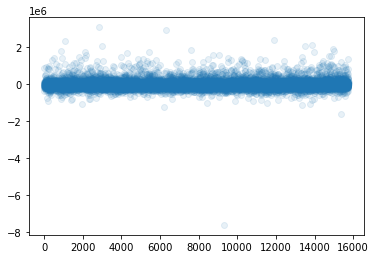

In [161]:
plt.scatter(x=range(y_hat.shape[0]), y=resid, alpha=0.1)

In [162]:
metrics.r2_score(model2_target, lr.predict(model2_features_scaled))

0.6451131048681321

In [163]:
metrics.mean_absolute_error(model2_target, lr.predict(model2_features_scaled))

136778.36317925385

In [165]:
metrics.mean_squared_error(model2_target, lr.predict(model2_features_scaled))

49167196168.52235